In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargo el dataset indicando que datetime es una fecha
df = pd.read_csv('../data/raw/precios_energia_comparativo.csv', parse_dates=['datetime'])

# la fecha como indice para facilitar los graficos temporales
df.set_index('datetime', inplace=True)
display(df.head())

,España,Francia,Portugal
datetime,,,
2014-01-01 23:00:00,25.280833,28.71125,25.043750
2014-01-02 23:00:00,39.924167,28.39750,38.980417
2014-01-03 23:00:00,4.992083,12.99750,4.683750
2014-01-04 23:00:00,4.091667,23.08500,4.091667
2014-01-05 23:00:00,13.587500,31.29000,12.762500


Panorama general de la evolucion del precio de la energia, España y Portugal estan casi encimadas ya que llevan una correlacion casi perfecta de 0.99 , es decir si sube la energia en Madrid tambien lo hace en Lisboa 

Francia por su parte se mantiene con costos mas accesibles pero cuenta con varios puntos de incrementos en los costos de los valores 

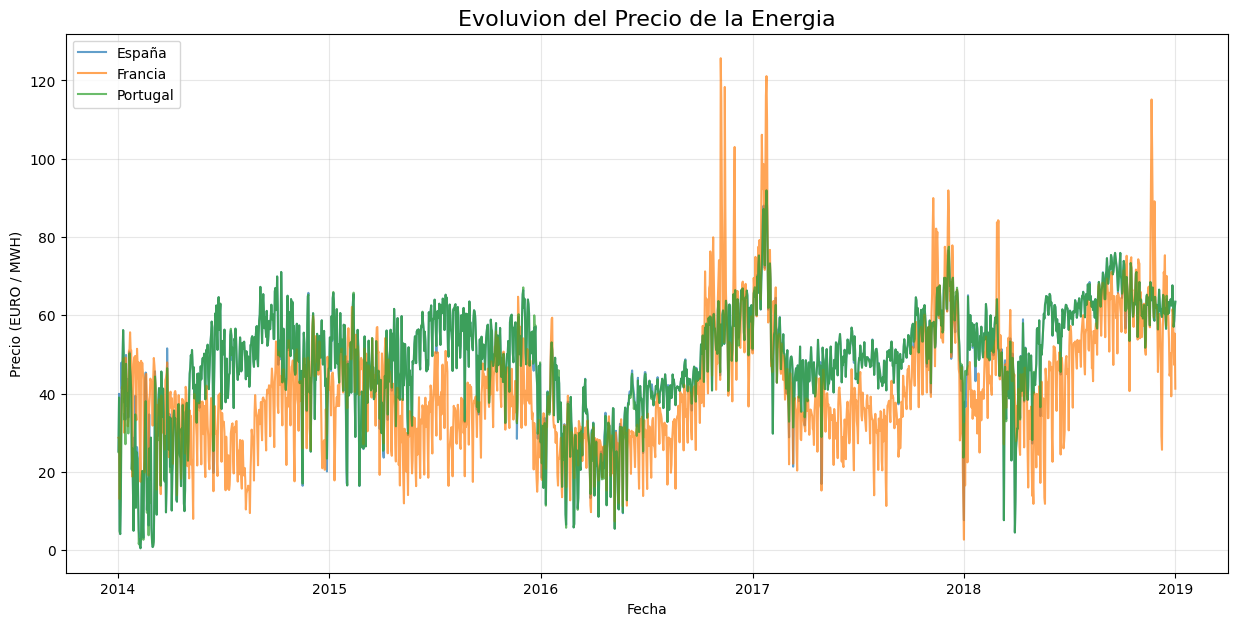

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['España'], label='España', alpha= 0.7)
plt.plot(df.index, df['Francia'], label='Francia', alpha= 0.7)
plt.plot(df.index, df['Portugal'], label='Portugal', alpha= 0.7)

plt.title('Evoluvion del Precio de la Energia', fontsize= 16)
plt.xlabel('Fecha')
plt.ylabel('Precio (EURO / MWH)')
plt.legend()
plt.grid(True, alpha= 0.3)
plt.show()

Box Plot de Estabilidad , caja mas pequeña indica un pais con precios mas predecibles mientras mayores outliers indican un pais propenso a crisis de los precios o picos repentinos 

en este caso Francia tiene un costo mas barato que España y Portugal que casi comparten la misma estadistica , pero Francia es mas propenso a tener picos repentinos de incremento de los precios 

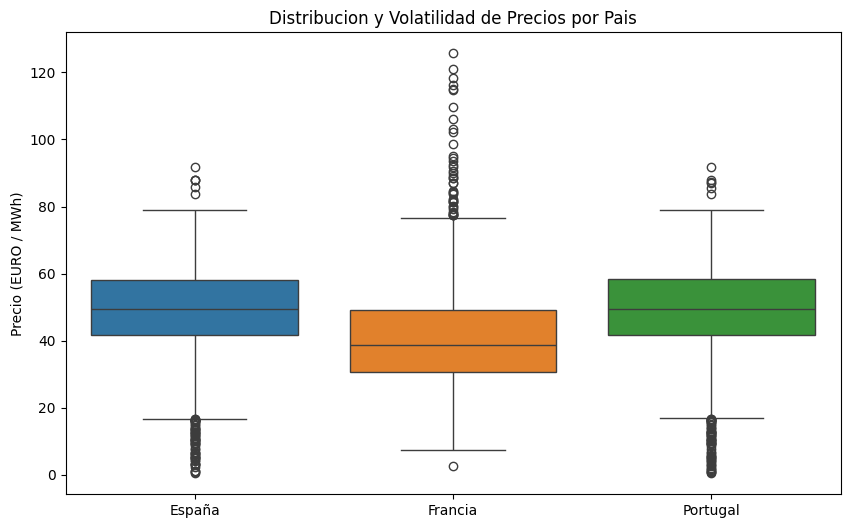

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Distribucion y Volatilidad de Precios por Pais')
plt.ylabel('Precio (EURO / MWh)')
plt.show()

In [13]:
# creo un dataset nuevo agrupado por mes (MS/Month Star)
df_mensual = df.resample('MS').mean()

Vemos los costos mensuales de manera limpia usando el nuevo dataset , y podemos identificar los puntos mas altos y mas bajos de los paises y en que mes se dieron y de que año corresponden 

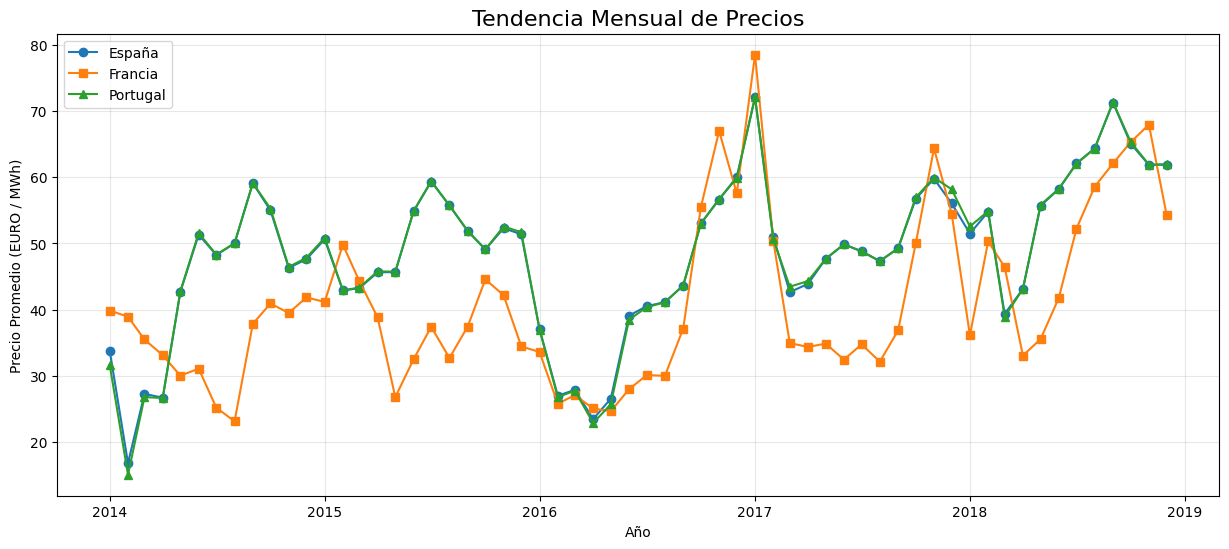

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(df_mensual.index, df_mensual['España'], marker='o', label='España')
plt.plot(df_mensual.index, df_mensual['Francia'], marker='s', label='Francia')
plt.plot(df_mensual.index, df_mensual['Portugal'], marker='^', label='Portugal')

plt.title('Tendencia Mensual de Precios', fontsize=16)
plt.ylabel('Precio Promedio (EURO / MWh)')
plt.xlabel('Año')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Prepacion de datos para Heatmap usando un povit para obtener datos mas ordenados de España 

In [ ]:
df_heatmap_españa = df_mensual.copy()
df_heatmap_españa['Año'] = df_heatmap_españa.index.year
df_heatmap_españa['Mes'] = df_heatmap_españa.index.month

df_pivot = df_heatmap_españa.pivot(index='Año', columns= 'Mes', values = 'España')

Podemos ver e interpretrar la tendencia en los meses de primavera suelen ser mas bajos los costos (marzo/abril), en tanto en los meses que mayor frecuencia tienen a subir los gastos son los meses mas frios (Diciembre/Enero )

En el 2018 vemos que hubo un factor externo (politico/climatico) que encarecio el costo de la energia en todo el año

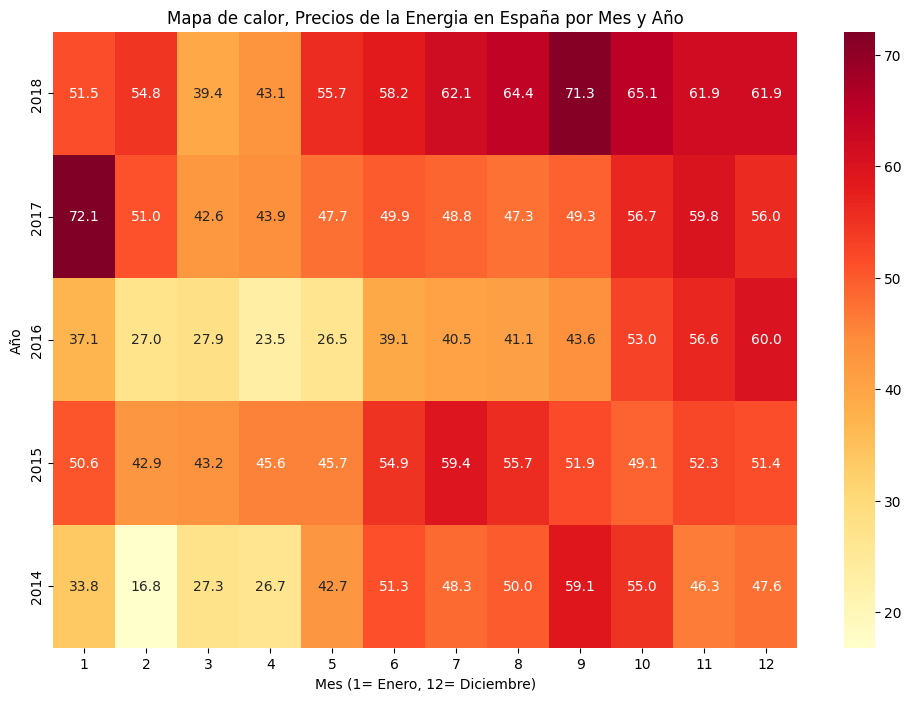

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot.iloc[::-1], annot=True, fmt=".1f", cmap= 'YlOrRd')
plt.title('Mapa de calor, Precios de la Energia en España por Mes y Año')
plt.xlabel('Mes (1= Enero, 12= Diciembre)')
plt.show()